# DVIZ Mini Projectproject.

## Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

## Load Dataset
Read ```.csv``` file from github repository

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/xXTime-OnXx/hslu-hs23/main/dviz/mini-project/wages.csv')

## Prepare Dataset

Split dataset into two subsets **men** and **women**

In [3]:
df_male_races = df[df.facet.str.contains('demographics: (white|black|hispanic) male')]
df_female_races = df[df.facet.str.contains('demographics: (white|black|hispanic) female')]

C:\Users\timon\AppData\Local\Temp\ipykernel_5980\550458530.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_male_races = df[df.facet.str.contains('demographics: (white|black|hispanic) male')]
C:\Users\timon\AppData\Local\Temp\ipykernel_5980\550458530.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_female_races = df[df.facet.str.contains('demographics: (white|black|hispanic) female')]


Transform values from **facet** column to only **white, black** and **hispanic**

In [4]:
df_male_races['facet'] = df_male_races['facet'].replace('demographics: white male','White')
df_male_races['facet'] = df_male_races['facet'].replace('demographics: black male','Black')
df_male_races['facet'] = df_male_races['facet'].replace('demographics: hispanic male','Hispanic')

df_female_races['facet'] = df_female_races['facet'].replace('demographics: white female','White')
df_female_races['facet'] = df_female_races['facet'].replace('demographics: black female','Black')
df_female_races['facet'] = df_female_races['facet'].replace('demographics: hispanic female','Hispanic')

## Set default variables for charts

In [5]:
title_text = "Women's wages are rising, but not equally."
subtitle_text = 'Mean hourly wages in nominal dollars'
caption = 'Source: Union Membership and Coverage Database\nGraphics: Thomas Shaw'

# orange, blue, gray
color_palette = ['#E58606', '#5D69B1', '#A5AA99']
yticks = [10, 20, 30, 40]

# add dollar sign to y ticks
ylabels = map(lambda x: str(x) + '$', yticks)
ylimit = [0, 40]

## Function to set axis default values

In [6]:
def axis_defaults(ax):
    ax.set_ylim(ylimit) # set y axis range
    ax.tick_params(width=2, length=8, labelcolor='#404040', left=False) # set tick width, length and color, hide left axis ticks
    ax.set_ylabel('') # remove label from y axis
    ax.set_xlabel('') # remove label from x axis
    ax.spines['bottom'].set_linewidth(2) # set bottom axis linewidth
    ax.spines.top.set_visible(False) # hide top spine
    ax.spines.left.set_visible(False) # hide top spine
    ax.spines.right.set_visible(False) # hide top spine
    ax.grid(axis='y', color='#e5e5e5') # set gridlines for y axis

## Plot the data with lineplots

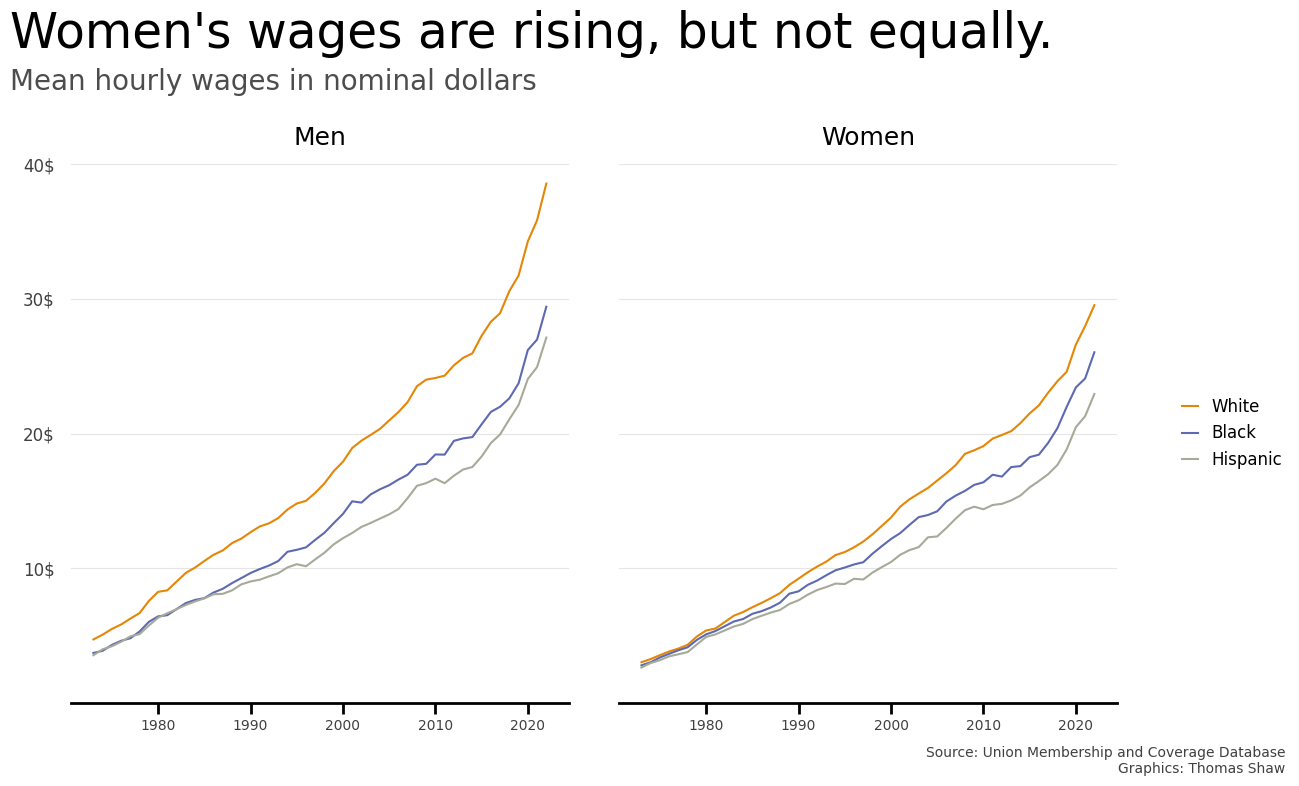

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.5,7))

# Set title above the charts and start from left
title = plt.suptitle(
    title_text,
    fontsize=35,
    x=0.08,
    y=1.1,
    ha='left'
)

# Set subtitle underneath the title and start from left
subtitle = ax1.annotate(
    xy=(0,-0.2),
    text=subtitle_text,
    ha='left',
    va='top',
    fontsize=20,
    color='#4d4d4d',
    xycoords=title # alignment based on title
)

# seaborn lineplot men's wage per year grouped by facet=race
sns.lineplot(x=df_male_races.year,
             y=df_male_races.wage,
             data=df_male_races,
             ax=ax1,
             palette=color_palette,
             hue="facet",
             legend=False)

# seaborn lineplot women's wage per year grouped by facet=race
sns.lineplot(x=df_female_races.year,
             y=df_female_races.wage, 
             data=df_female_races,
             ax=ax2,
             palette=color_palette,
             hue="facet")

# first chart's title
ax1.set_title('Men', fontsize=18, pad=14);
# set y tick labels for first chart
ax1.set_yticks(ticks=yticks, labels=ylabels, fontsize=12, color='#404040')
axis_defaults(ax1)

# second chart's title
ax2.set_title('Women', fontsize=18, pad=14);
# set y tick labels for second chart
ax2.set_yticks(ticks=yticks, labels=ylabels)
axis_defaults(ax2)

# legend centered to the rigth of the second chart without frame
l = ax2.legend(bbox_to_anchor=(1.1,0.5), loc='center left', fontsize='12', handlelength=1, frameon=False)

# set caption underneath both charts aligned to the right
f.text(1.025, 0.01, caption, color='#404040', ha='right')

# reduce space between charts
plt.subplots_adjust(wspace=0.1)